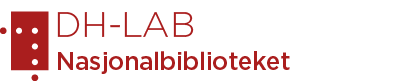

## Oppstart

In [4]:
from dhlab.module_update import update, css
import dhlab.nbtext as nb
from dhlab.nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import dhlab.graph_networkx_louvain as gnl
import dhlab.token_map as tm
%matplotlib inline


plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)

from dhlab import Corpus
import dhlab as dh

In [2]:
import warnings
warnings.filterwarnings('ignore')

css()

## Navn i bøker

Finn en bok.

In [18]:

urns = Corpus(doctype="digibok", author="mykle", title="røde")
# urns.frame.urn.to_list()
urns

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,ocr_timestamp
0,100475735,URN:NBN:no-nb_digibok_2008111304085,Sangen om den røde rubin,"Mykle , Agnar",oai:nb.bibsys.no:990100392604702202,97356f611c399a74591d352f15cda72e,8205277400,[Oslo],20010101,2001,Gyldendal,nob,,839.823,novel,Skjønnlitteratur,digibok,nb,20060101
1,100442704,URN:NBN:no-nb_digibok_2008100104083,Sangen om den røde rubin,"Mykle , Agnar",oai:nb.bibsys.no:999802005804702202,b0177425b68689c76492fc12b2314d5d,8205253617,[Oslo],19980101,1998,Gyldendal,nob,,"839.823 500 ""Teksten i nærværende utgave følge...",fiction,Skjønnlitteratur,digibok,nb,20060101
2,100437990,URN:NBN:no-nb_digibok_2021030248601,Sangen om den røde rubin : roman,"Mykle , Agnar",oai:nb.bibsys.no:991001720244702202,8f4bd26da544492fa32ceca23704d211,,[Oslo],20100101,2010,Gyldendal,nob,norsk / litteratur / roman,839.823,novel,Skjønnlitteratur,digibok,nb,20060101
3,100457241,URN:NBN:no-nb_digibok_2008021404040,Sangen om den røde rubin,"Mykle , Agnar",oai:nb.bibsys.no:999524738954702202,7783c9f0eaf1279650d64ffef1f32139,8205232660,Oslo,19950101,1995,Gyldendal,nob,norske / romaner / 1950-tallet,839.823,fiction,Skjønnlitteratur,digibok,nb,20060101
4,100437352,URN:NBN:no-nb_digibok_2021031509001,Sangen om den røde rubin,"Borgersen , Morten / Mykle , Agnar / Mykle , A...",oai:nb.bibsys.no:991011745004702202,3aacb9e9c9bc5d84de758c337a161eac,,[Oslo],20100101,2010,Riksteatret,nob,,792.9,drama,Skjønnlitteratur,digibok,nb,20060101
5,100521141,URN:NBN:no-nb_digibok_2007052404016,Sangen om den røde rubin : roman,"Mykle , Agnar",oai:nb.bibsys.no:998620665654702202,94e9c5eb87ef88836c675a98793e5ba8,8205040850,Oslo,19670101,1967,Gyldendal,nob,norsk / litteratur / romaner,839.823,fiction,Skjønnlitteratur,digibok,nb,20060101
6,100280507,URN:NBN:no-nb_digibok_2016020808126,Sangen om den røde rubin,"Mykle , Agnar",oai:nb.bibsys.no:990005305814702202,08b690a1662d4725cb3d1e8d719567df,8205273197,[Oslo],20000101,2000,Det Nye,nob,,839.823,fiction,Skjønnlitteratur,digibok,nb,20060101
7,100263007,URN:NBN:no-nb_digibok_2015090129001,Sangen om den røde rubin : roman,"Mykle , Agnar",oai:nb.bibsys.no:997521646004702202,16af2b161b8aa4d9f8ea5378b19c8aec,,Oslo,19560101,1956,Gyldendal,nob,,839.93 / 839.82,fiction,Skjønnlitteratur,digibok,nb,20060101
8,100505038,URN:NBN:no-nb_digibok_2009033100094,Sangen om den røde rubin,"Mykle , Agnar",oai:nb.bibsys.no:990222770724702202,187b355556860869828990c16fa30ce7,8252547745,[Oslo],20020101,2002,Den norske bokklubben,nob,,839.823,fiction,Skjønnlitteratur,digibok,nb,20060101
9,100243069,URN:NBN:no-nb_digibok_2015022308062,Sangen om den røde rubin : fritt etter Agnar M...,"Borgersen , Morten / Mykle , Agnar",oai:nb.bibsys.no:991011746674702202,1f6b7eab8b5d4edeb8d4c291b2705879,,Oslo,20100101,2010,Riksteatret,nob,,,,Uklassifisert,digibok,nb,20060101


In [19]:

# Fetch URNs

# urns = nb.book_urn(author = 'mykle%',  title = '%røde%', limit=100)
urns = Corpus(doctype="digibok", author="mykle", title="røde", limit=100).frame.urn.to_list()
urns

['URN:NBN:no-nb_digibok_2008111304085',
 'URN:NBN:no-nb_digibok_2009033100094',
 'URN:NBN:no-nb_digibok_2008012304077',
 'URN:NBN:no-nb_digibok_2018071607007',
 'URN:NBN:no-nb_digibok_2009011504069',
 'URN:NBN:no-nb_digibok_2021031509001',
 'URN:NBN:no-nb_digibok_2015090129001',
 'URN:NBN:no-nb_digibok_2008100104083',
 'URN:NBN:no-nb_digibok_2007052404016',
 'URN:NBN:no-nb_digibok_2021030248601',
 'URN:NBN:no-nb_digibok_2016020808126',
 'URN:NBN:no-nb_digibok_2008021404040',
 'URN:NBN:no-nb_digibok_2014040406070',
 'URN:NBN:no-nb_digibok_2012020708059',
 'URN:NBN:no-nb_digibok_2008021104029',
 'URN:NBN:no-nb_digibok_2015022308062']

Her ønsker vi den komplette, så vi kan bruke kommandoen `book_count()` for å få antallet ord i hver bok.

In [23]:
help(dh.Chunks)

Help on class Chunks in module dhlab.text.chunking:

class Chunks(builtins.object)
 |  Chunks(urn=None, chunks=1000)
 |  
 |  Create chunks from a text.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, urn=None, chunks=1000)
 |      :param urn: str or list
 |      :param chunks: {'para', 'avsn'} or int
 |  
 |  to_pandas(self)
 |      Vectorize into a pandas dataframe with words a index
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [22]:
help(dh.Counts)

Help on class Counts in module dhlab.text.conc_coll:

class Counts(dhlab.text.dhlab_object.DhlabObj)
 |  Counts(corpus=None, words=None)
 |  
 |  Provide counts for a corpus - shouldn't be too large
 |  
 |  Method resolution order:
 |      Counts
 |      dhlab.text.dhlab_object.DhlabObj
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, corpus=None, words=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  sum(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  from_df(df) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from dhlab.text.dhlab_object.DhlabObj:
 |  
 |  __repr__(self) -> str
 |      Return the string representation of the  DhlabObj frame attribute
 |  
 |  head(self, n=5)
 |  
 |  sort(self, by=None, asc=False)
 |  
 |  tail(self, n=5)
 |  
 |  to_csv(self, path)
 

In [24]:
dh.Chunks("URN:NBN:no-nb_digibok_2015022308062")

In [20]:
[nb.book_count(x) for x in urns]

KeyboardInterrupt: 

Vi legger URN-en i en variabel. Det gjør det lettere å gjøre endringer, og kjøre notebooken på andre bøker.

In [ ]:
BOOK = 2015090129001

## Navn

Navn er alt som starter med store bokstaver, men som også forekommer utenom punktum. Kommando er  'names()'.

In [ ]:
wp = nb.names(BOOK, cutoff=15)
tm.show_names(wp)

Lag 1

    Ask - 872
    Daniel - 120
    Doffen - 116
    Gud - 88
    Embla - 86
    Robert - 67
    Constance - 64
    Økonomiske - 48
    Eirik - 46
    Fiffolo - 45
    Wilhelmine - 42
    Norge - 39
    Stabell - 38
    Molly - 37
    Floden - 35
    Stallen - 33
    Francis - 29
    Wolfgang - 28
    Sosialistisk - 26
    Tyskland - 26
    Burlefot - 23
    Sangen - 23
    Abrahamsen - 22
    Poppi - 22
    Studentersamfunnet - 22
    Studentlag - 22
    Taraldsen - 22
    Frankrike - 20
    Gunnhild - 20
    Hm - 18
    Maia - 18
    Vil - 17
    Hitler - 16

Lag 2

    Eirik Floden - 23
    Francis Stabell - 22
    Sosialistisk Studentlag - 20
    Ask Burlefot - 15
    Gud Gud - 1

Lag 3


Lag 4




Noe kan fjernes, enkelte ord dukker opp som ikke er navn.

In [ ]:
tm.token_map(wp)

[(('Abrahamsen',), ('Abrahamsen',)),
 (('Ask',), ('Ask', 'Burlefot')),
 (('Burlefot',), ('Ask', 'Burlefot')),
 (('Constance',), ('Constance',)),
 (('Daniel',), ('Daniel',)),
 (('Doffen',), ('Doffen',)),
 (('Eirik',), ('Eirik', 'Floden')),
 (('Embla',), ('Embla',)),
 (('Fiffolo',), ('Fiffolo',)),
 (('Floden',), ('Eirik', 'Floden')),
 (('Francis',), ('Francis', 'Stabell')),
 (('Frankrike',), ('Frankrike',)),
 (('Gud',), ('Gud', 'Gud')),
 (('Gunnhild',), ('Gunnhild',)),
 (('Hitler',), ('Hitler',)),
 (('Hm',), ('Hm',)),
 (('Maia',), ('Maia',)),
 (('Molly',), ('Molly',)),
 (('Norge',), ('Norge',)),
 (('Poppi',), ('Poppi',)),
 (('Robert',), ('Robert',)),
 (('Sangen',), ('Sangen',)),
 (('Sosialistisk',), ('Sosialistisk', 'Studentlag')),
 (('Stabell',), ('Francis', 'Stabell')),
 (('Stallen',), ('Stallen',)),
 (('Studentersamfunnet',), ('Studentersamfunnet',)),
 (('Studentlag',), ('Sosialistisk', 'Studentlag')),
 (('Taraldsen',), ('Taraldsen',)),
 (('Tyskland',), ('Tyskland',)),
 (('Vil',), ('V

## Lag navnegrafen

Kommando er `make_network_name(<URN>, <liste over ord>)` fra modulen `token_map`

In [ ]:
graf = tm.make_network_name_graph(BOOK, tokens=wp)

Vis grafen med `show_graph`

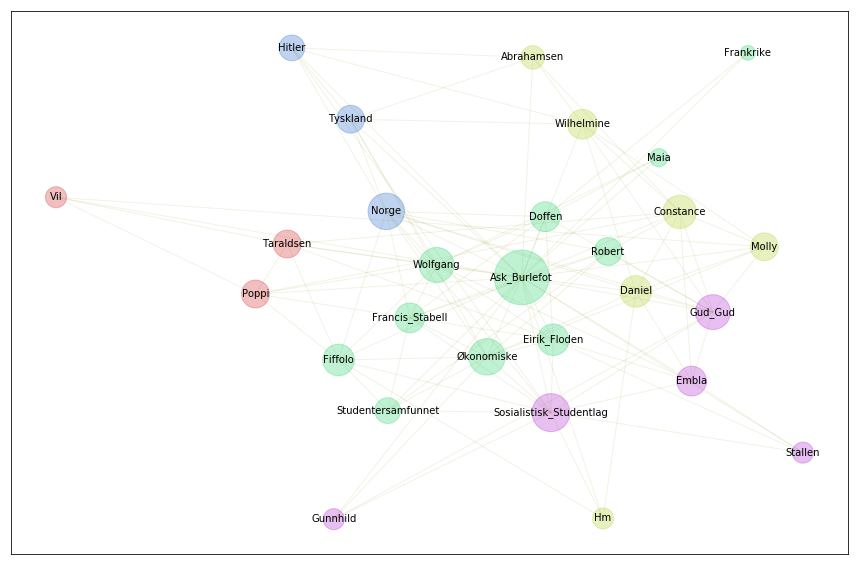

In [ ]:
gnl.show_graph(graf, spread=1.8)

## Studer hvordan navnene henger sammen

In [ ]:
gnl.show_communities(graf)

Constance-Daniel :  Constance, Daniel, Wilhelmine, Molly, Abrahamsen, Hm

Ask_Burlefot-Økonomiske :  Ask_Burlefot, Økonomiske, Wolfgang, Eirik_Floden, Fiffolo, Francis_Stabell, Doffen, Robert, Studentersamfunnet, Maia, Frankrike

Norge-Tyskland :  Norge, Tyskland, Hitler

Sosialistisk_Studentlag-Gud_Gud :  Sosialistisk_Studentlag, Gud_Gud, Embla, Stallen, Gunnhild

Taraldsen-Poppi :  Taraldsen, Poppi, Vil



Clustrene kan brukes til historieplotting (se også kapittel narrative grafer)

In [ ]:
gcom = gnl.community_dict(graf)
gcom

{'Constance-Daniel': ['Constance',
  'Daniel',
  'Wilhelmine',
  'Molly',
  'Abrahamsen'],
 'Ask_Burlefot-Økonomiske': ['Ask_Burlefot',
  'Økonomiske',
  'Wolfgang',
  'Eirik_Floden',
  'Fiffolo',
  'Francis_Stabell',
  'Doffen',
  'Robert',
  'Studentersamfunnet',
  'Hm',
  'Maia',
  'Frankrike'],
 'Norge-Tyskland': ['Norge', 'Tyskland', 'Hitler'],
 'Sosialistisk_Studentlag-Gud_Gud': ['Sosialistisk_Studentlag',
  'Gud_Gud',
  'Embla',
  'Stallen',
  'Gunnhild'],
 'Taraldsen-Poppi': ['Taraldsen', 'Poppi', 'Vil']}

Henter ut vekstdiagrammet med `plot_book_wordbags(<urn>, <ordsekker>, window=<..>)` og plotter med `plot`.

In [ ]:
wp_diagram = nb.plot_book_wordbags(BOOK, gcom,window = 5000)

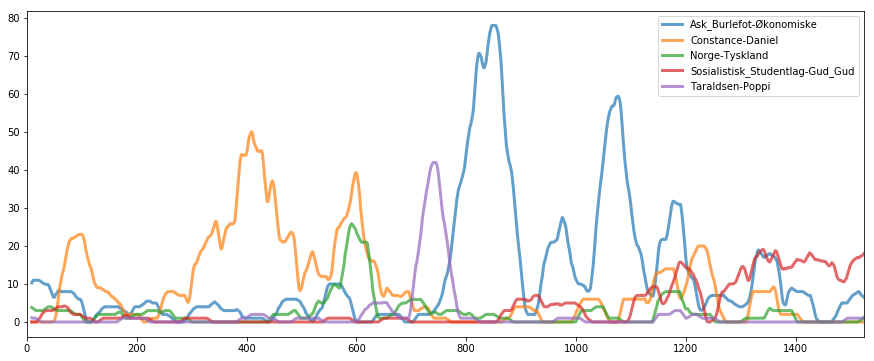

In [ ]:
plot(wp_diagram.rolling(window=10).mean());